<a href="https://colab.research.google.com/github/Sarah1542/Test2-Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-----------------Imports-------------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score

#-----------Uplode & Read DataSet---------


In [ ]:
from google.colab import files
import io
uploaded = files.upload()
print("Uploaded files:", uploaded.keys())
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
pd.set_option('display.max_columns', None)
print(df.head())

Saving Mall_Customers.csv to Mall_Customers (2).csv
Uploaded files: dict_keys(['Mall_Customers (2).csv'])
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#--------------Data Cleaning-----------------


In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.00000

#-----------Dataset Visualization-------------


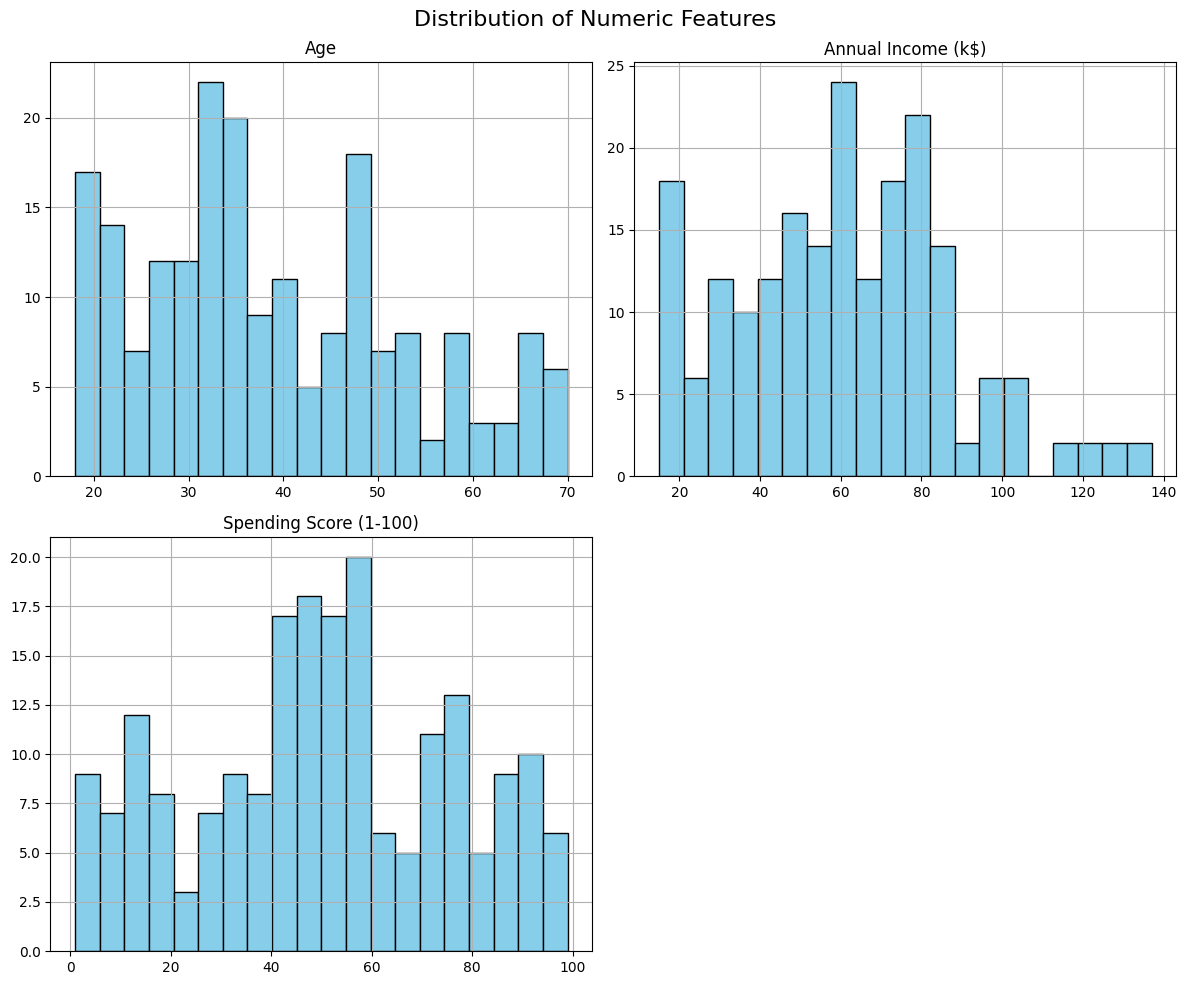

In [ ]:
#"Distribution of Numeric Features"
columns1=['Age','Annual Income (k$)','Spending Score (1-100)']
df[columns1].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


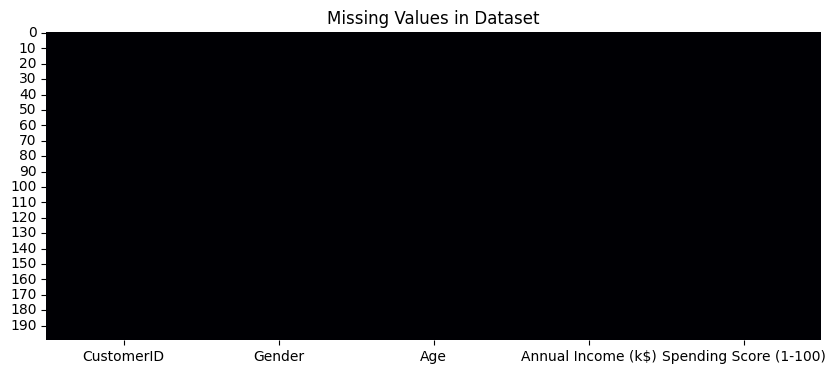

In [ ]:
#"Missing Values in Dataset"
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values in Dataset")
plt.show()



/tmp/ipython-input-3159904285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")


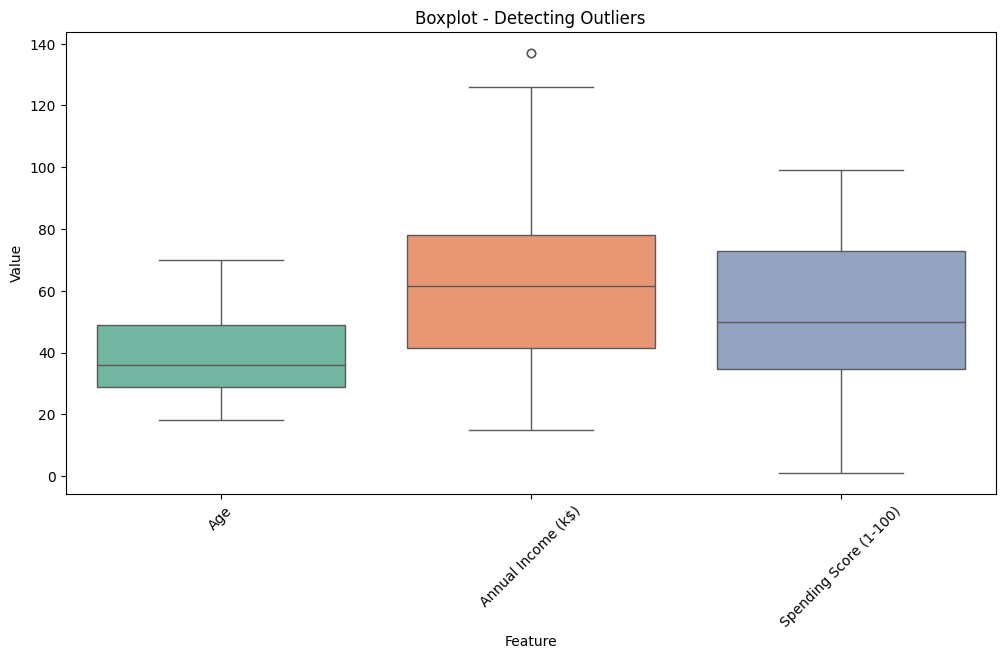

In [ ]:
#"Boxplot - Detecting Outliers"
df_melted = df[columns1].melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(12,6))
sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot - Detecting Outliers")
plt.show()


------------------Feature Choice & scaling------------------

In [ ]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler=StandardScaler()
x_saled=scaler.fit_transform(x)

-------------------Knowing Optimal number of cluster--------------------

In [ ]:
for k in range(2, 11):#"we should use the maximum score so its 5"
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
    score = silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], labels)
    print(f"Number of clusters: {k}, Silhouette Score: {score}")


Number of clusters: 2, Silhouette Score: 0.39564531743995546
Number of clusters: 3, Silhouette Score: 0.46761358158775435
Number of clusters: 4, Silhouette Score: 0.4937945814354117
Number of clusters: 5, Silhouette Score: 0.553931997444648
Number of clusters: 6, Silhouette Score: 0.5128405328004378
Number of clusters: 7, Silhouette Score: 0.5017174409749505
Number of clusters: 8, Silhouette Score: 0.4962769338093321
Number of clusters: 9, Silhouette Score: 0.45587414130065596
Number of clusters: 10, Silhouette Score: 0.4426214845978157


-----------------------KMeans algorism------------------------

In [ ]:
Kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42,n_init=10)
labels=Kmeans.fit_predict(x)
df["Cluster"]=labels


------------------------DBSCAN------------------------


In [ ]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
y_dbscan=dbscan.fit_predict(x)
df["Cluster"]=labels


-------------------------KMeans Visualization----------------------

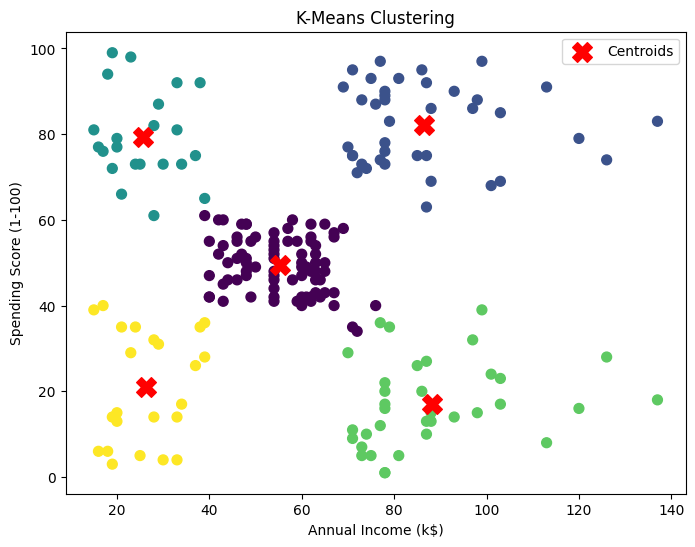

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=labels, cmap="viridis", s=50)
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1],
            s=200, c="red", marker="X", label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

-------------------------DBSCAN Visualization--------------------

/tmp/ipython-input-1373469346.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


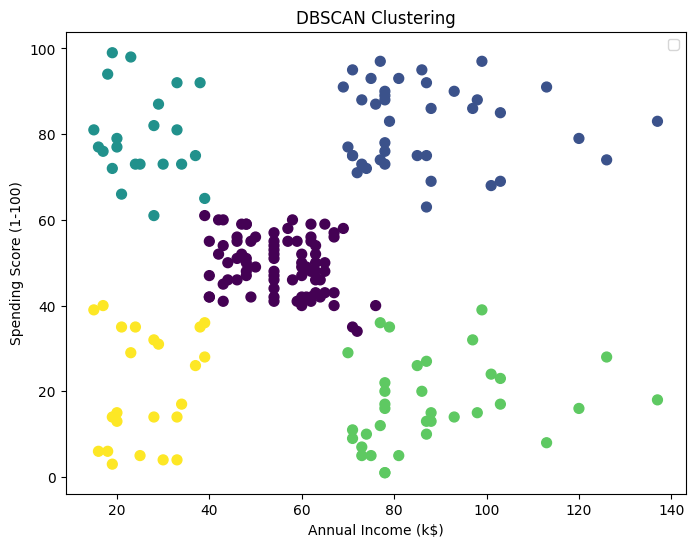

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=labels, cmap="viridis", s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

In [ ]:
import joblib

# Save models
joblib.dump(Kmeans, "Kmeans_model.pkl")
joblib.dump(dbscan, "DBCAN_model.pkl")


['DBCAN_model.pkl']

In [ ]:
from google.colab import files
files.download("Kmeans_model.pkl")
files.download("DBCAN_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>